In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os

In [2]:
print(os.listdir('../data'))

['DJI_fe.csv', 'DJI_STO_20period_sma10.csv', 'N225.csv', 'DJI_modified_features - DJI.csv', 'N225fillVOL.csv', 'DJI_modified_sma.csv', 'downjone5y.csv', 'N225withoutNULL.csv', 'dowjone1985_2019.csv', '.ipynb_checkpoints', 'DJI_ema.csv', 'DJI_denoise.csv']


In [3]:
df = pd.read_csv('../data/DJI_fe.csv')
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,sma_5,sma_10,sma_25,sma_75,sma_125,sma_200,%K,%D
0,0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000,1287.013989,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
spans = [5, 10, 25, 75, 125, 200]

for span in spans:
    ema_short = df['Close'].ewm(span=span, adjust=False).mean()
    df['ema_' + str(span)] = ema_short

In [5]:
df.head()

,Unnamed: 0,Date,Open,High,Low,Close,Adj Close,Volume,sma_5,sma_10,...,sma_125,sma_200,%K,%D,ema_5,ema_10,ema_25,ema_75,ema_125,ema_200
0,0,1985-01-29,1277.719971,1295.489990,1266.890015,1292.619995,1292.619995,13560000,NaN,NaN,...,NaN,NaN,NaN,NaN,1292.619995,1292.619995,1292.619995,1292.619995,1292.619995,1292.619995
1,1,1985-01-30,1297.369995,1305.099976,1278.930054,1287.880005,1287.880005,16820000,NaN,NaN,...,NaN,NaN,NaN,NaN,1291.039998,1291.758179,1292.255380,1292.495258,1292.544757,1292.572831
2,2,1985-01-31,1283.239990,1293.400024,1272.640015,1286.770020,1286.770020,14070000,NaN,NaN,...,NaN,NaN,NaN,NaN,1289.616672,1290.851241,1291.833430,1292.344594,1292.453095,1292.515092
3,3,1985-02-01,1276.939941,1286.109985,1269.770020,1277.719971,1277.719971,10980000,NaN,NaN,...,NaN,NaN,NaN,NaN,1285.651105,1288.463737,1290.747779,1291.959736,1292.219235,1292.367876
4,4,1985-02-04,1272.079956,1294.939941,1268.989990,1290.079956,1290.079956,11630000,1287.013989,NaN,...,NaN,NaN,NaN,NaN,1287.127389,1288.757595,1290.696408,1291.910268,1292.185279,1292.345111


/usr/local/lib/python3.6/site-packages/pandas/plotting/_core.py:1716: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  series.name = label


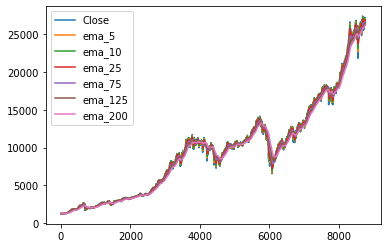

In [6]:
cols = ['Close']
for span in spans:
    cols.append('ema_' + str(span))
df.plot(y=cols, legend=True)

In [8]:
df.to_csv('../data/DJI_fe.csv')